# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:


# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + "f517dfd8690e047943792cf3881d20df"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1



# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
   

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | kattivakkam
Processing Record 3 of Set 1 | semera
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | barrouallie
Processing Record 6 of Set 1 | sao joaquim
Processing Record 7 of Set 1 | broome
Processing Record 8 of Set 1 | tsiombe
Processing Record 9 of Set 1 | tazovsky
Processing Record 10 of Set 1 | shimoda
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | severomorsk
Processing Record 21 of Set 1 | tolanaro
Processing Record 22 of Set 1 | bredasdorp
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,8.32,64,100,1.43,NZ,2024-08-02 00:34:55
1,kattivakkam,13.2167,80.3167,29.52,76,100,3.92,IN,2024-08-02 00:34:56
2,semera,11.5010,41.2010,25.11,65,100,1.28,ET,2024-08-02 00:34:57
3,blackmans bay,-43.0167,147.3167,9.85,78,17,0.89,AU,2024-08-02 00:34:58
4,barrouallie,13.2333,-61.2667,26.01,76,97,2.07,VC,2024-08-02 00:34:59


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,8.32,64,100,1.43,NZ,2024-08-02 00:34:55
1,kattivakkam,13.2167,80.3167,29.52,76,100,3.92,IN,2024-08-02 00:34:56
2,semera,11.5010,41.2010,25.11,65,100,1.28,ET,2024-08-02 00:34:57
3,blackmans bay,-43.0167,147.3167,9.85,78,17,0.89,AU,2024-08-02 00:34:58
4,barrouallie,13.2333,-61.2667,26.01,76,97,2.07,VC,2024-08-02 00:34:59


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


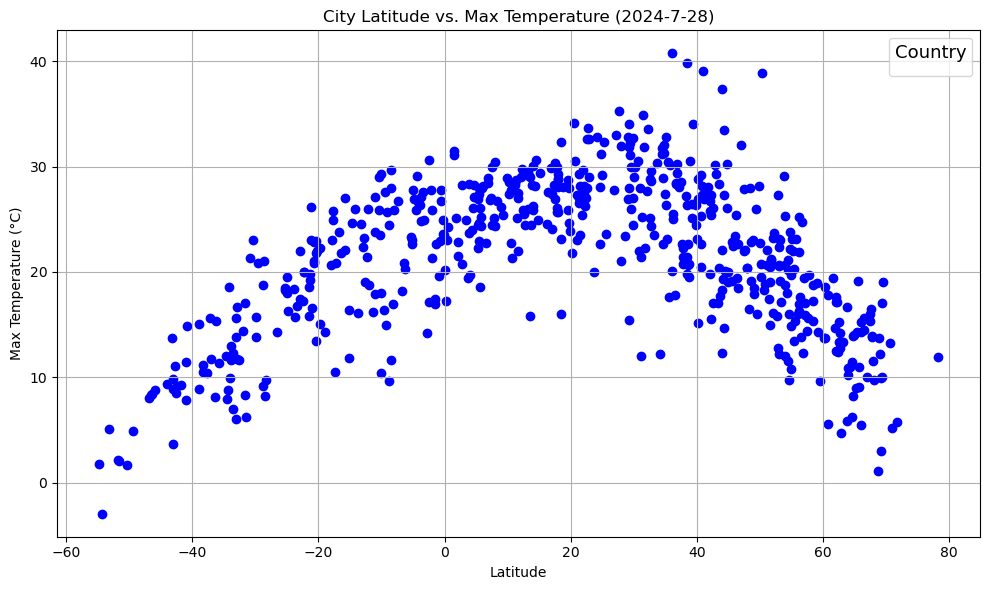

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', marker='o')  # Create scatter plot
plt.title('City Latitude vs. Max Temperature (2024-7-28)')  # Add a title
plt.xlabel('Latitude')  # Add x-label
plt.ylabel('Max Temperature (°C)')  # Add y-label
plt.grid(True)  # Show grid


# Incorporate the other graph properties
plt.legend(title='Country', title_fontsize='13', fontsize='11')  # Add a legend with customized font sizes
plt.tight_layout()  # Adjust layout to fit everything neatly

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


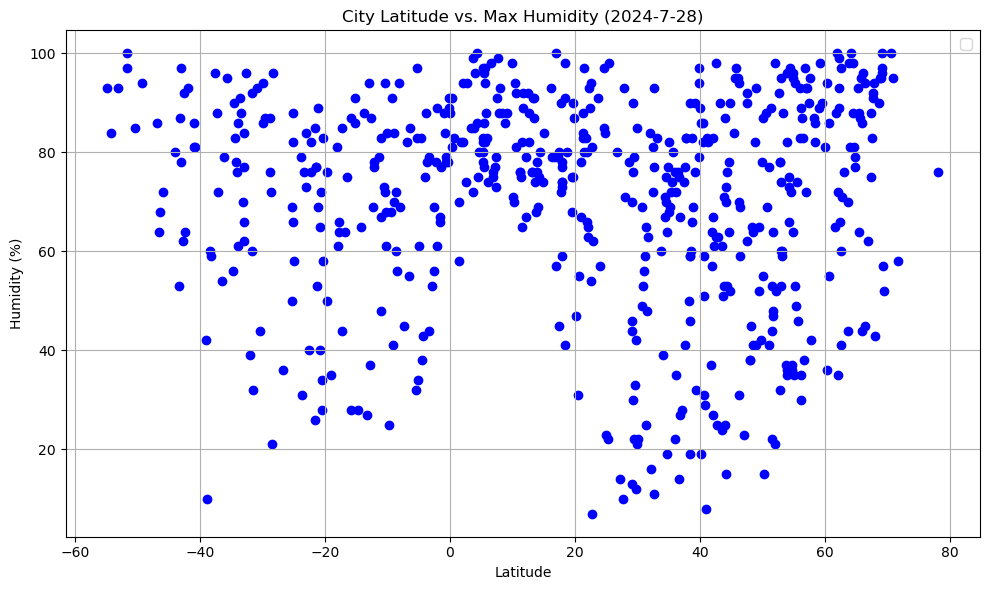

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue', marker='o')  # Create scatter plot
plt.title('City Latitude vs. Max Humidity (2024-7-28)')  # Add a title
plt.xlabel('Latitude')  # Add x-label
plt.ylabel('Humidity (%)')  # Add y-label
plt.grid(True)  # Show grid


# Incorporate the other graph properties
plt.legend(title_fontsize='13', fontsize='11')  # Add a legend with customized font sizes
plt.tight_layout()  # Adjust layout to fit everything neatly

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [10]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


#### Latitude Vs. Cloudiness

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


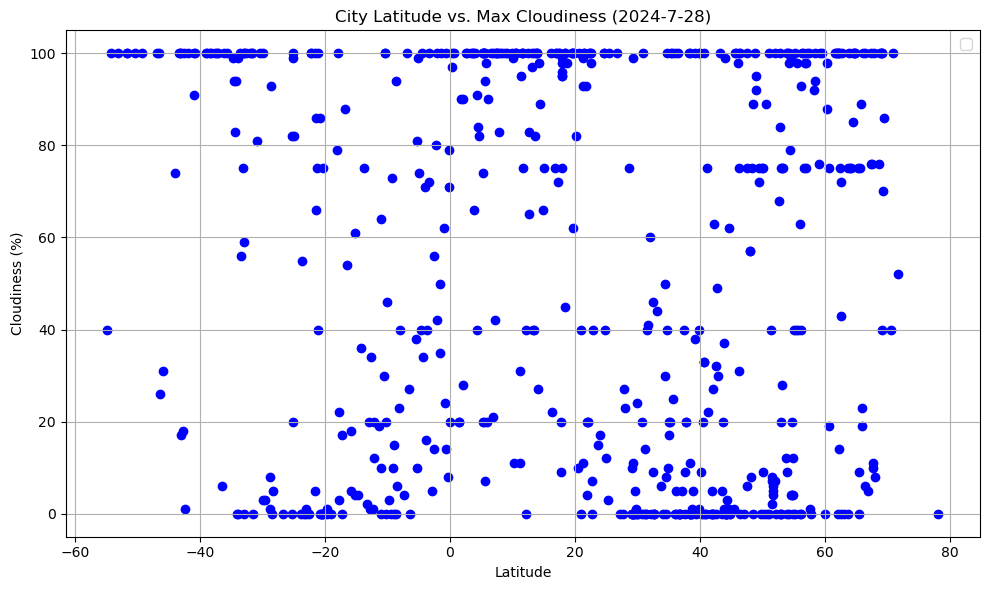

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='blue', marker='o')  # Create scatter plot
plt.title('City Latitude vs. Max Cloudiness (2024-7-28)')  # Add a title
plt.xlabel('Latitude')  # Add x-label
plt.ylabel('Cloudiness (%)')  # Add y-label
plt.grid(True)  # Show grid


# Incorporate the other graph properties
plt.legend(title_fontsize='13', fontsize='11')  # Add a legend with customized font sizes
plt.tight_layout()  # Adjust layout to fit everything neatly

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


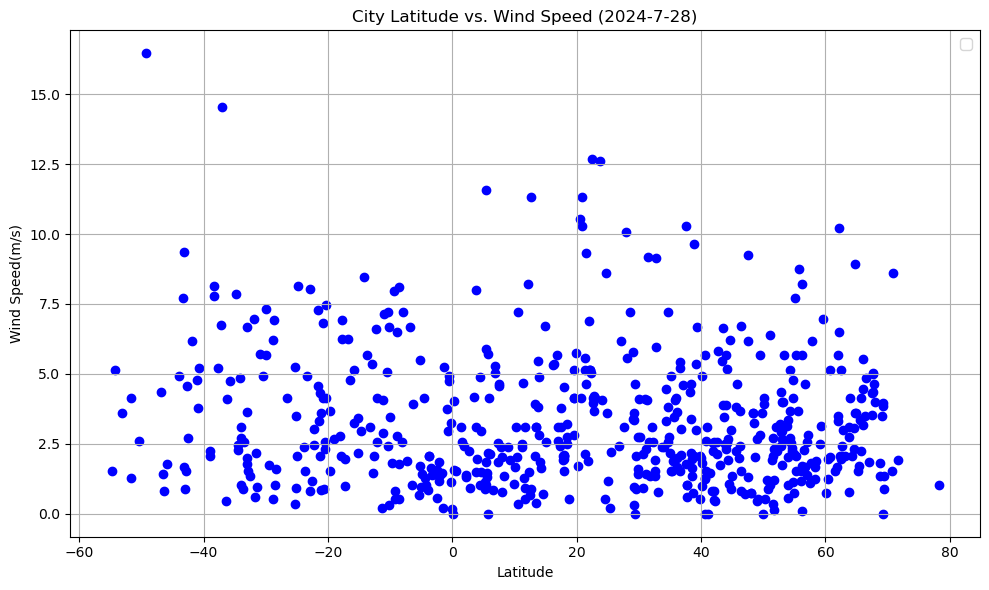

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue', marker='o')  # Create scatter plot
plt.title('City Latitude vs. Wind Speed (2024-7-28)')  # Add a title
plt.xlabel('Latitude')  # Add x-label
plt.ylabel('Wind Speed(m/s)')  # Add y-label
plt.grid(True)  # Show grid


# Incorporate the other graph properties
plt.legend(title_fontsize='13', fontsize='11')  # Add a legend with customized font sizes
plt.tight_layout()  # Adjust layout to fit everything neatly

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

# Filter for Northern Hemisphere (latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kattivakkam,13.2167,80.3167,29.52,76,100,3.92,IN,2024-08-02 00:34:56
2,semera,11.5010,41.2010,25.11,65,100,1.28,ET,2024-08-02 00:34:57
4,barrouallie,13.2333,-61.2667,26.01,76,97,2.07,VC,2024-08-02 00:34:59
6,broome,42.2506,-75.8330,25.43,61,63,0.45,US,2024-08-02 00:35:01
8,tazovsky,67.4667,78.7000,15.37,88,76,4.32,RU,2024-08-02 00:35:03


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

# Filter for Southern Hemisphere (latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,8.32,64,100,1.43,NZ,2024-08-02 00:34:55
3,blackmans bay,-43.0167,147.3167,9.85,78,17,0.89,AU,2024-08-02 00:34:58
5,sao joaquim,-28.2939,-49.9317,9.76,96,5,1.60,BR,2024-08-02 00:35:00
7,tsiombe,-25.3000,45.4833,18.47,69,82,0.34,MG,2024-08-02 00:35:02
12,ushuaia,-54.8000,-68.3000,1.81,93,40,1.54,AR,2024-08-02 00:33:33


###  Temperature vs. Latitude Linear Regression Plot

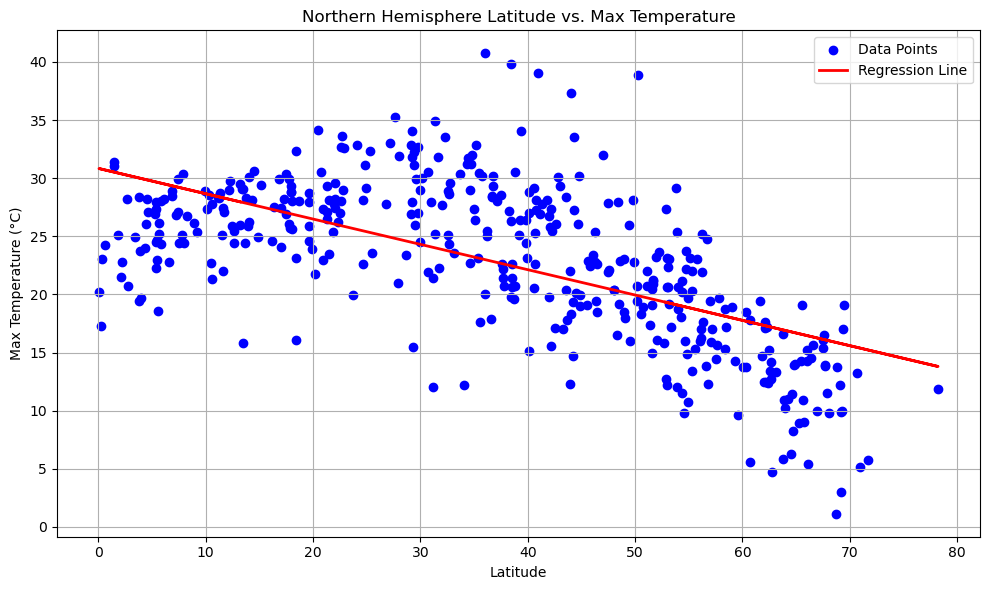

In [18]:
# Linear regression on Northern Hemisphere
# Create DataFrame with Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform Linear Regression
def plot_linregress(x, y, xlabel='Latitude', ylabel='Max Temperature (°C)', title='Linear Regression Plot', filename='TempVLatRPlot_N_R.png'):
    
    x = np.array(x)
    y = np.array(y)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate predicted y values
    y_pred = intercept + slope * x

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', marker='o', label='Data Points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    output_path = f"output_data/TempVLatRPlot_N_R.png"
    plt.savefig(output_path)
   

    # Show plot
    plt.show()

# Extracting data for linear regression
latitude = northern_hemi_df['Lat']
max_temp = northern_hemi_df['Max Temp']

# Plot linear regression for Northern Hemisphere data
plot_linregress(latitude, max_temp, title='Northern Hemisphere Latitude vs. Max Temperature')


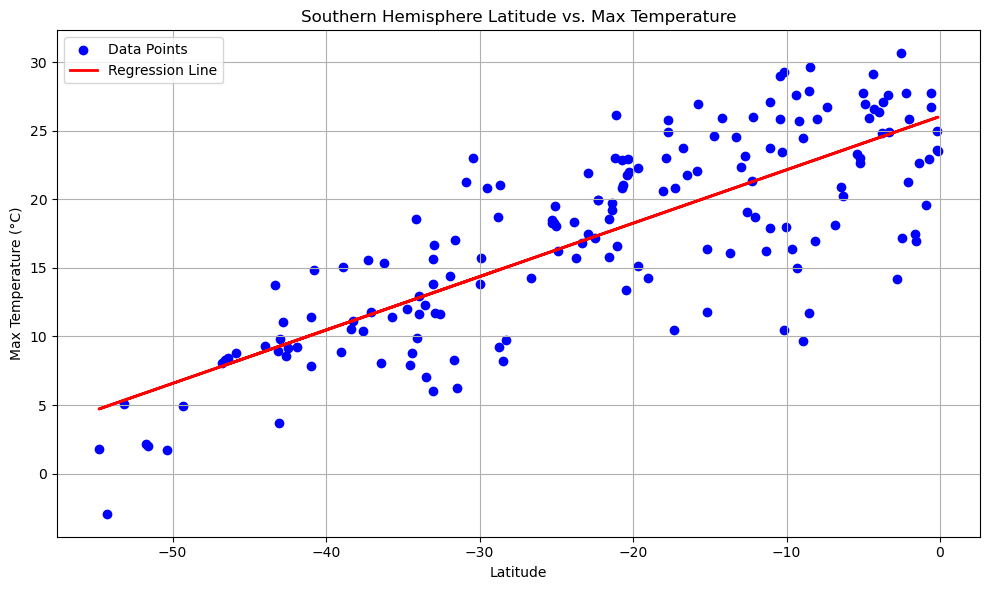

In [19]:
# Linear regression on Southern Hemisphere
# Create DataFrame with Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Perform Linear Regression
def plot_linear_regression(x, y, xlabel='Latitude', ylabel='Max Temperature (°C)', title='Linear Regression Plot', filename='TempVLatRPlot_S_R.png'):
    
    x = np.array(x)
    y = np.array(y)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate predicted y values
    y_pred = intercept + slope * x

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', marker='o', label='Data Points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    output_path = f"output_data/TempVLatRPlot_S_R.png"
    plt.savefig(output_path)


    # Show plot
    plt.show()

# Extracting data for linear regression
latitude = southern_hemi_df['Lat']
max_temp = southern_hemi_df['Max Temp']

# Plot linear regression for Northern Hemisphere data
plot_linear_regression(latitude, max_temp, title='Southern Hemisphere Latitude vs. Max Temperature')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

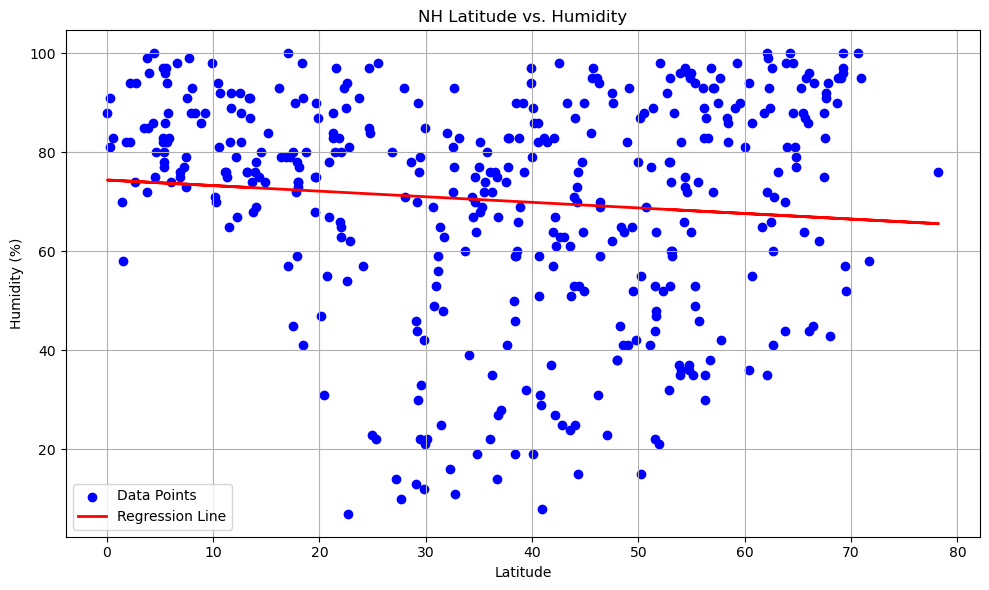

In [20]:
def plot_linear_regression(x, y, xlabel='Latitude', ylabel='Humidity (%)', title='NH Linear Regression Plot', filename='HumVLat_N_R.png'):
    
    x = np.array(x)
    y = np.array(y)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate predicted y values
    y_pred = intercept + slope * x

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', marker='o', label='Data Points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    output_path = f"output_data/HumVLat_N_R.png"
    plt.savefig(output_path)

    # Show plot
    plt.show()

# Extracting data for linear regression
latitude = northern_hemi_df['Lat']
humidity = northern_hemi_df['Humidity']

# Plot linear regression for Latitude vs. Humidity
plot_linear_regression(latitude, humidity, title='NH Latitude vs. Humidity')


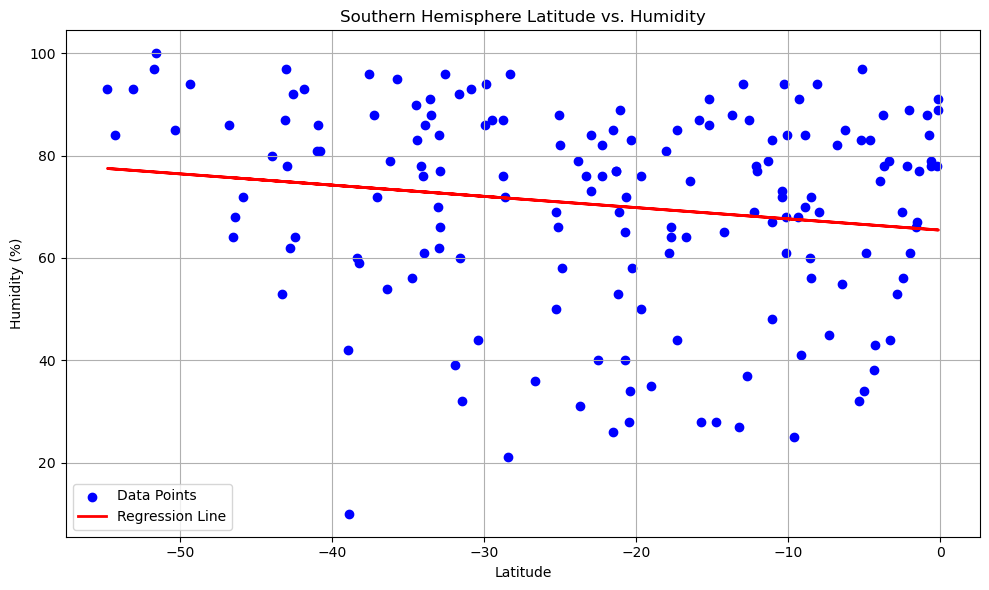

In [21]:
# Southern Hemisphere
def plot_linear_regression(x, y, xlabel='Latitude', ylabel='Humidity (%)', title='SH Linear Regression Plot', filename='HumVLat_S_R.png'):
    
    x = np.array(x)
    y = np.array(y)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate predicted y values
    y_pred = intercept + slope * x

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', marker='o', label='Data Points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    output_path = f"output_data/HumVLat_S_R.png"
    plt.savefig(output_path)

    # Show plot
    plt.show()

# Extracting data for linear regression
latitude = southern_hemi_df['Lat']
humidity = southern_hemi_df['Humidity']

# Plot linear regression for Latitude vs. Humidity
plot_linear_regression(latitude, humidity, title='Southern Hemisphere Latitude vs. Humidity')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

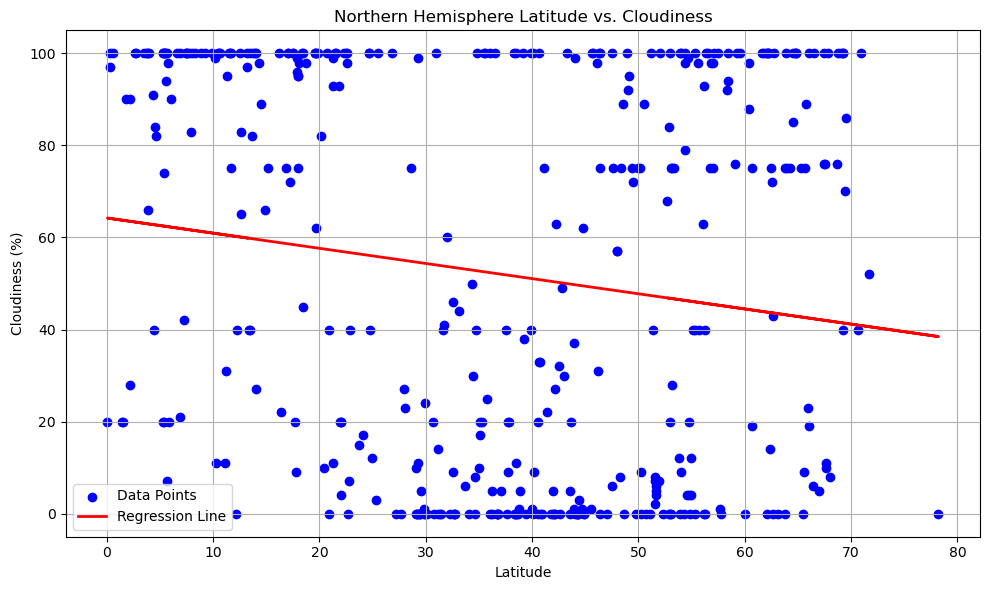

In [27]:


def plot_linregress(x, y, xlabel='Latitude', ylabel='Cloudiness (%)', title='Linear Regression Plot', filename='ClouVLat_N_R.png'):
    # Convert to numpy arrays
    x = np.array(x)
    y = np.array(y)

    # Remove NaN values and ensure x and y have the same length
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x = x[valid_indices]
    y = y[valid_indices]

    # Check if lengths match
    if len(x) != len(y):
        raise ValueError(f'Length mismatch: x has {len(x)} elements and y has {len(y)} elements')

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate predicted y values
    y_pred = intercept + slope * x

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', marker='o', label='Data Points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    output_path = f"output_data/{filename}"
    plt.savefig(output_path)

    # Show plot
    plt.show()

# Extracting data for linear regression
latitude = northern_hemi_df['Lat']
cloudiness = northern_hemi_df['Cloudiness']

# Plot linear regression for Latitude vs. Cloudiness
plot_linregress(latitude, cloudiness, title='Northern Hemisphere Latitude vs. Cloudiness')



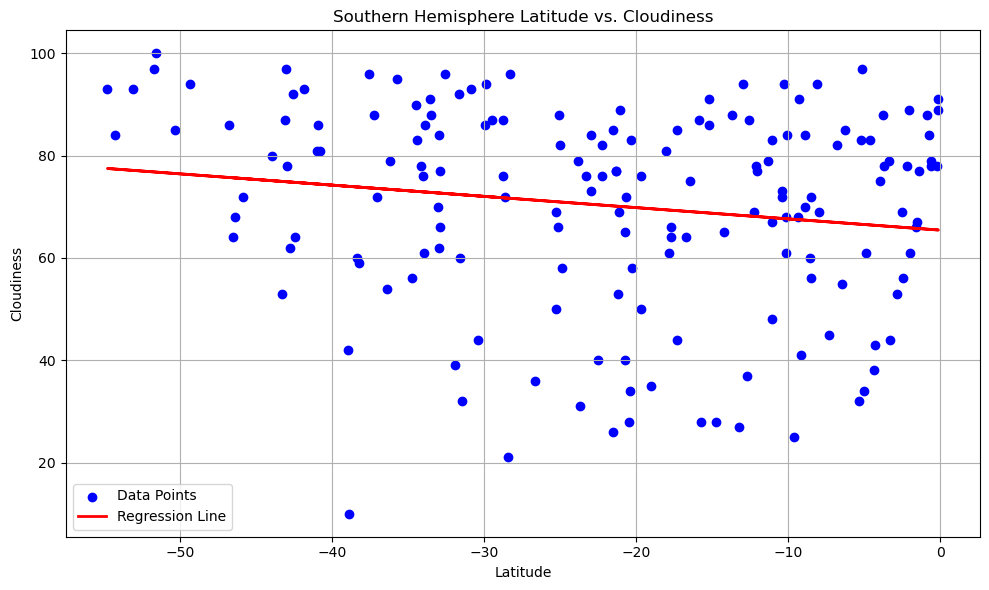

In [28]:
# Southern Hemisphere
def plot_linear_regression(x, y, xlabel='Latitude', ylabel='Cloudiness', title='SHLinear Regression Plot', filename='CloVLat_S_R.png'):
    
    # Reshape the data for sklearn
    x = np.array(x)
    y = np.array(y)

    # Remove NaN values and ensure x and y have the same length
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x = x[valid_indices]
    y = y[valid_indices]

    # Check if lengths match
    if len(x) != len(y):
        raise ValueError(f'Length mismatch: x has {len(x)} elements and y has {len(y)} elements')

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate predicted y values
    y_pred = intercept + slope * x

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', marker='o', label='Data Points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    output_path = f"output_data/{filename}"
    plt.savefig(output_path)
   
    # Show plot
    plt.show()

# Extracting data for linear regression
latitude = southern_hemi_df['Lat']
Cloudiness = southern_hemi_df['Cloudiness']

# Plot linear regression for Latitude vs. Cloudiness
plot_linear_regression(latitude, humidity, title='Southern Hemisphere Latitude vs. Cloudiness')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

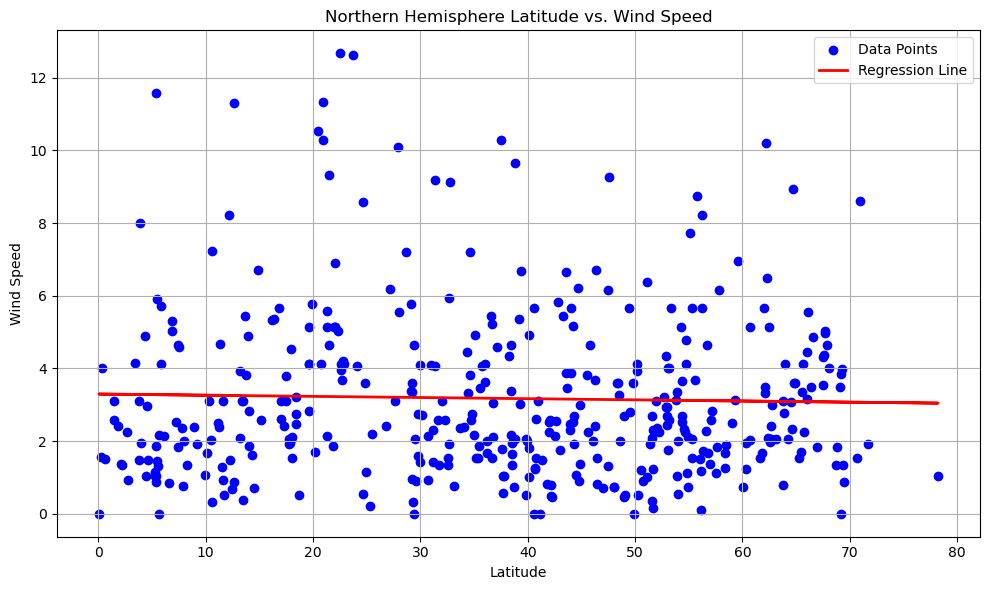

In [30]:

# Northern Hemisphere
def plot_linear_regression(x, y, xlabel='Latitude', ylabel='Wind Speed', title='NH Linear Regression Plot', filename='WindSpVLat_N_R.png'):
    
    # Reshape the data for sklearn
    x = np.array(x)
    y = np.array(y)

    # Remove NaN values and ensure x and y have the same length
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x = x[valid_indices]
    y = y[valid_indices]

    # Check if lengths match
    if len(x) != len(y):
        raise ValueError(f'Length mismatch: x has {len(x)} elements and y has {len(y)} elements')

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate predicted y values
    y_pred = intercept + slope * x

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', marker='o', label='Data Points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    output_path = f"output_data/{filename}"
    
    # Ensure directory exists
    import os
    if not os.path.exists(os.path.dirname(output_path)):
        os.makedirs(os.path.dirname(output_path))

    plt.savefig(output_path)
   
    # Show plot
    plt.show()

# Extracting data for linear regression
latitude = northern_hemi_df['Lat']
wind_speed = northern_hemi_df['Wind Speed']  # Correct variable name

# Plot linear regression for Latitude vs. Wind Speed
plot_linear_regression(latitude, wind_speed, title='Northern Hemisphere Latitude vs. Wind Speed')


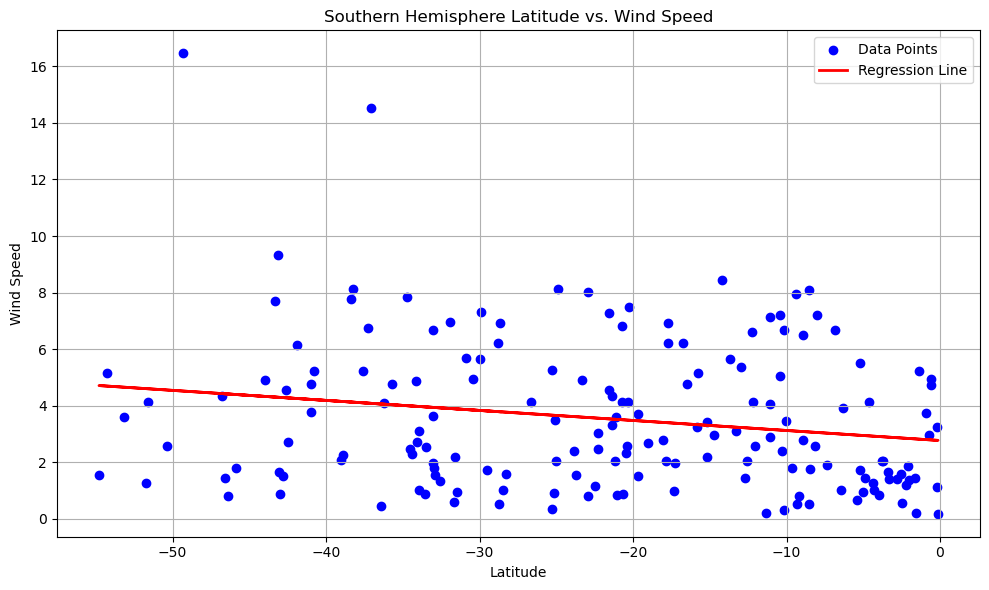

In [31]:
# Southern Hemisphere
def plot_linear_regression(x, y, xlabel='Latitude', ylabel='Wind Speed', title='SH Linear Regression Plot', filename='WindSpVLat_S_R.png'):
    
    # Reshape the data for sklearn
    x = np.array(x)
    y = np.array(y)

    # Remove NaN values and ensure x and y have the same length
    valid_indices = ~np.isnan(x) & ~np.isnan(y)
    x = x[valid_indices]
    y = y[valid_indices]

    # Check if lengths match
    if len(x) != len(y):
        raise ValueError(f'Length mismatch: x has {len(x)} elements and y has {len(y)} elements')

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate predicted y values
    y_pred = intercept + slope * x

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', marker='o', label='Data Points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    output_path = f"output_data/{filename}"
    
    # Ensure directory exists
    import os
    if not os.path.exists(os.path.dirname(output_path)):
        os.makedirs(os.path.dirname(output_path))

    plt.savefig(output_path)
   
    # Show plot
    plt.show()

# Extracting data for linear regression
latitude = southern_hemi_df['Lat']
wind_speed = southern_hemi_df['Wind Speed']  # Correct variable name

# Plot linear regression for Latitude vs. Wind Speed
plot_linear_regression(latitude, wind_speed, title='Southern Hemisphere Latitude vs. Wind Speed')


**Discussion about the linear relationship:** YOUR RESPONSE HERE